# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 

Enough about the process, let's get to the content! Welcome to ... (drumroll drumroll drumroll)

# <center> The Legend of Zelda: Breath of the Wild </center>

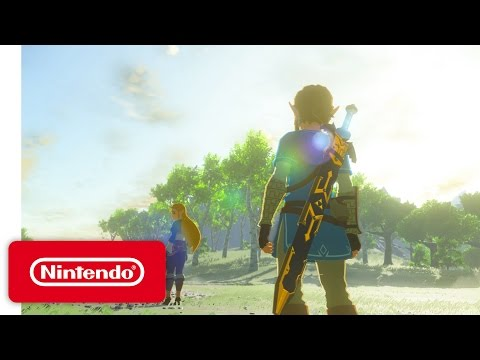

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("zw47_q9wbBE",width=800, height=450)

Today, we will use network science and the [Zelda Wiki](https://zelda.fandom.com/wiki/Main_Page) to learn about the relationships of BotW characters. 

To create the network, we will download the Zelda Wiki pages for all characters in BotW (enemies and bosses included). Next, we will create the network of the pages that link to each other. Since wiki pages not only link to [Link](https://zelda.fandom.com/wiki/Link) but also to each other (Anna: "yes.. I know.. bad joke -- but come on our hero's name is Link!!!! I can't help myself"). So [Link](https://zelda.fandom.com/wiki/Link) links to  [Princess Zelda](https://zelda.fandom.com/wiki/Princess_Zelda) and viceversa, for example.  

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to understand the text displayed on those pages.

But for today, the tasks are:

* Learn about regular expressions
* Learn about Pandas dataframes
* Download and store (for later use) all characters and their pages from the Zelda Wiki
* Extract all the internal wiki-links that connect the characters on the Zelda Wiki
* Generate the network of characters from the Zelda Wiki. 
* Calculate some simple network statistics.

---

# Prelude part 1: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us, up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wiki links. And for that we need regular expressions.

> _Exercises_: Regular expressions round 1\.
> 
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples.
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/regex_exercise.txt).
> 

Finally, we need to figure out how to match internal Zelda wiki links. Zelda wiki links come in different [flavors](https://zelda.fandom.com/wiki/Guidelines:Getting_Started). First, let's focus on those linking to pages directly (this step will help us collecting the list of characters).

Direct links are always enclosed in double square brackets, e.g. `[[name of character]]`, or double curly brackets, `{{Term|Series|name of character|link}}` and occur like this:

    ... some text [[Princess Zelda]] some more text ...
    ... some text {{Term|BotW|Princess Zelda|link}} some more text ...
    
both linking to the page [`https://zelda.fandom.com/wiki/Princess_Zelda`](https://zelda.fandom.com/wiki/Princess_Zelda).

The second type of link uses text that is different from the page name, here's an example:

    ... some text [[Princess Zelda|Zelda]] some more text ... 
    ... some text {{Term|BotW|Princess Zelda|link|display=Zelda}} some more text ...

both still linking to the page [`https://zelda.fandom.com/wiki/Princess_Zelda`](https://zelda.fandom.com/wiki/Princess_Zelda). Note that there are many series of The Legend of Zelda, but, because we are going to focus on Breath of the Wild (BotW) and to make our data collection a little bit easier, we will **not look for direct links to other series** even if characters can be recurrent (i.e. we will look for links in double curly brackets always in the form `{{Term|BotW|name of character|link}}`).

Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the direct Zelda wiki links from the [Zelda test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/Zelda_regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

# Prelude part 2: Pandas DataFrames


Before starting, we will also learn a bit about [pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), a very user-friendly data structure that you can use to manipulate tabular data. Pandas dataframes are implemented within the [pandas package](https://pandas.pydata.org/).

Pandas dataframes should be intuitive to use. **We suggest you to go through the [10 minutes to Pandas tutorial](https://pandas.pydata.org/pandas-docs/version/0.22/10min.html#min) to learn what you need to solve the next exercise.**

---

# Part A: Download the Zelda Wikipages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, we had planned this all along!). I've included it below for your covenience.

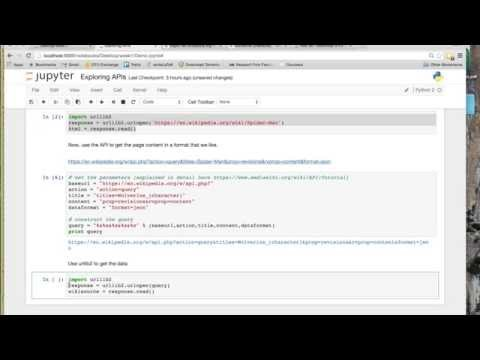

In [2]:
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

Now, to download the Zelda wiki pages of characters, we first need to collect the list of all characters in BotW, starting from the following pages:

1. [The list of allies](https://zelda.fandom.com/wiki/Characters_in_Breath_of_the_Wild)
2. [The list of enemies](https://zelda.fandom.com/wiki/Enemies_in_Breath_of_the_Wild)
3. [The list of bosses](https://zelda.fandom.com/wiki/Bosses_in_Breath_of_the_Wild)



> 
>  _Exercise 1_: Collect the list of BotW Characters 
>
> If you open any of the pages above, you will quickly see that characters are divided by their location in the game (allies) or type (enemies and bosses) and organized alphabetically, but, most importantly, their names are displayed in the form of links to their page. This means that if we use regular expressions to detect all links in the page description we will find them all! Let's get started:
> 1. for each page above, find the baseurl and title and build the related API query (add the parameter `rvslots=*` to your query's content)
> 2. use the query to collect the page (you can save it in a json file for future use) and extract its content
> 3. build a regular expression to find all characters' names (**hint**: all links in these pages have the same format, i.e. `{{Term|Series|name of character|link}}`)
> 4. add the characters names and their role (i.e. "Ally", "Enemy", and "Boss") in a Pandas DataFrame. How many unique characters did you find? How many of them are allies, enemies, and bosses? Are there any repeated characters? If so, drop the duplicates, then save the data in a csv file
>
> **Note**: 
> 1. In the Enemies page there is a section called "Traps", we do not want to include this list in our dataset
> 2. Some Bosses have a link in *parenthesis* to their location in the game, you should filter these links out

You've made it! Now, you have a clean file listing all characters in BotW and their role. By following the same strategy you used to download the pages above, you can now use the API and download each character page. For each character, save the resulting page content in a txt file. 

**Note**: 
1. the name of the character corresponds to the title of its page (where spaces are replaced with underscores). So, the title of `Princess Zelda`'s page is `Princess_Zelda`
2. some of your character's names could actually redirect to a different page. Add a check to find any redirect in a page description. (**hint**: the description will be in the form `#REDIRECT [[PAGENAME]]` so you should use `PAGENAME` in your query instead)

---

# Part B: Building the network

Now, we're going to build the BotW NetworkX directed graph, which includes all good characters, enemies, and bosses. 

The nodes in the network will be all the characters, and we will place an edge between nodes $A$ and $B$ if the Zelda wiki page of node $A$ links to the Zelda Wiki page of node $B$.

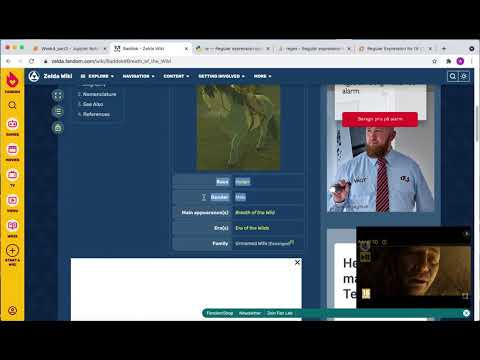

In [3]:
YouTubeVideo("eciQ6qgRD-4", width=800, height=450)

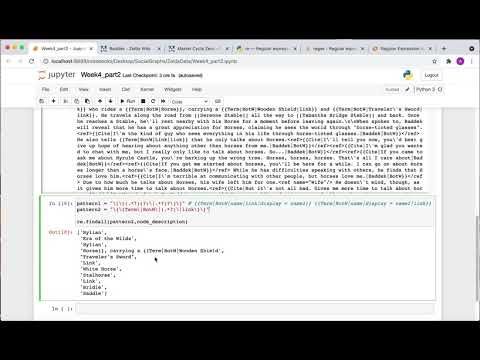

In [4]:
YouTubeVideo("J7SF0Xs2PHM", width=800, height=450)

> _Exercise 1_: Build the network of BotW Characters 
>
> Now we can build the network. Isn't this a little bit cool? What a dataset :)
>
> The overall strategy for this is the following: 
> Take the pages you have downloaded for each character. 
> Each page corresponds to a character, which is a node in your network. 
> Find the Race and Gender of a character in their Infobox and use regular expressions to extract them. Then, find all the hyperlinks in a character's page that link to another node of the network (e.g. another character). 
> There are many ways to do this, but below, I've tried to break it down into natural steps. 
> Keep in mind that the network should include all characters (allies, enemies, and bosses).
> 
>
> * Use regular expressions to extract all outgoing links from each of the pages you downloaded above. Remember that links have different [flavors](https://zelda.fandom.com/wiki/Guidelines:Getting_Started), these are the ones we need (they seem a lot but you've already built the patterns in 1. and 2. and just need to add a condition to them):
      1. direct links, i.e. [[name of character]] or {{Term|BotW|name of character|link}}
      2. links using text, i.e. [[Princess Zelda|Zelda]] or {{Term|Series|Princess Zelda|link|display=Zelda}}
      3. links to pages that have parentheses, i.e. [[Ocarina of Time (Item)|]] or {{Term|Series|Ocarina of Time (Item)|link}}
      4. links using plural terms, i.e. [[Heart]]s or {{Plural|Series|Heart|link}}
      5. links to sections of another page, i.e. [[Link#Breath of the Wild]] or {{Term|BotW|Link|link}}
>
> * For each link you extract, check if the target is a character. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.github.io/documentation/development/reference/classes.digraph.html) to store the network. Store also the properties of the nodes (i.e. from which universe they hail).
> * When you have finished, you'll notice that some nodes do not have any edge. Those are isolated nodes, you may *discard* them from the network.
>
> **Note**: When you add a node to the network, also include an `attribute` for each node characteristic (i.e. an attribute that specifies Role, Race, and Gender)


> *Exercise 2*: Simple network statistics and analysis
>
> * What is the number of nodes in the network? 
> * More importantly, what is the number of links?
> * Plot the distributions of Role, Race, and Gender.
> * Plot the total (in+out), in and out-degree distributions. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the degree distribution to a *random network* with the same number of nodes and *p*
>     * Compare the degree distribution to a *scale-free* network with the same number of nodes.
> * Who is the top connected character in BotW? (Report results for the undirected network, in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?
> * Who are the top 5 most connected allies (again in terms of all edges, and in/out-degree)?
> * Who are the top 5 most connected enemies -- bosses included -- (again in terms of all edges in/out-degree)?

> The total degree distribution (in + out degree) for you network should resemble the distribution displayed on the image below *(`Isolated` means that we have discarded the nodes with zero degrees)*:
![img](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/files/week4_degrees.png?raw=true)
> *Tip:* If you want your `matplotlib` plots to look like the one above, you can download the `seaborn` package and do the following: `import seaborn as sns
sns.set()`
